## Compresser une image sans degrader sa qualite visuelle


In [312]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import scipy
import huffman
from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow

import scipy.fftpack

import matplotlib.pylab as pylab

%matplotlib inline 


### Q.1 Pour réduire significativement la taille de l'image, quelles sont à votre avis les informations d'une image qui pourraient être éliminées sans trop dégrader le contenu de l'image?

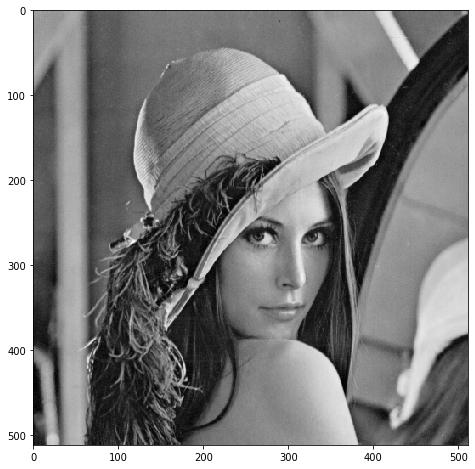

In [228]:
#lecture image Lena.png
image = (cv2.imread('lena.png',0))
plt.figure(figsize = (8,8))
plt.imshow(image, cmap = 'gray')
plt.show()

### Q.2 Calculer la DCT sur l'image entier et commentaire les résultats obtenu.

##### Definition DCT et iDCT en 2D
#### Utiliser la fontion scipy.fftpack.dct
#### https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.fftpack.dct.html

In [34]:
#Fonction pour calculer la DCT en 2D
def dct2(image):
    #écrire code
    dct_l = scipy.fftpack.dct(image, axis=0, norm  = 'ortho')
    dctImg = scipy.fftpack.dct(dct_l, axis=1, norm  = 'ortho')
    return dctImg

def idct2(image):
    #écrire code
    idct_l = scipy.fftpack.idct(image, axis=0, norm  = 'ortho')
    idctImg = scipy.fftpack.idct(idct_l, axis=1, norm  = 'ortho')
    return idctImg

##### Calculer la DCT sur l'image entier

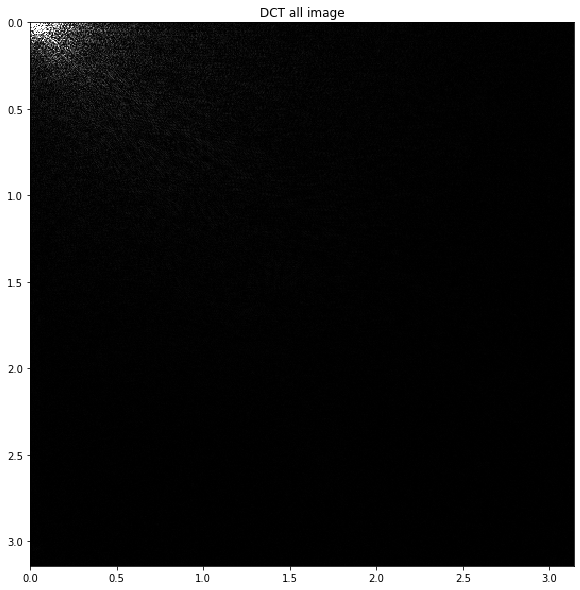

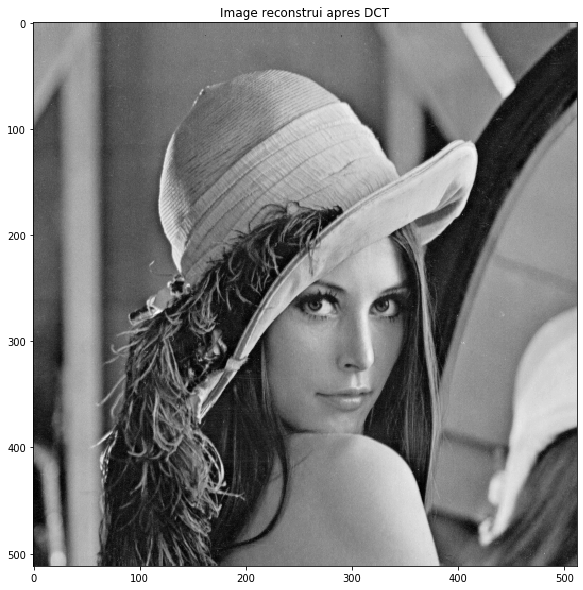

In [35]:
#calcul DCT2 sur l'image entiere
dct_image = dct2(image)

#affichage DCT2 sur l'image entiere
plt.figure(figsize = (20,10))
plt.imshow(np.absolute(dct_image),cmap='gray',vmax= np.max(dct_image)*0.01,vmin = 0, extent=[0,pi,pi,0])#pour afficher la DCT fundamental des 
                                                                                                  #ajouter ces parametres à la fonction 
                                                                                                  # plt.imshow
plt.title( "DCT all image")
plt.show()

#affichage iDCT2 sur l'image entiere
image_rec = idct2(dct_image)
plt.figure(figsize = (20,10))
plt.imshow(image_rec, cmap = 'gray')
plt.title( "Image reconstrui apres DCT")
plt.show()

<span style="color:blue">Commentaire de la DCT obtenu.</span>

### Q.3: 
### Calculer la DCT sur de block de l'image de taille 8x8
<span style="color:blue">Realiser une fonction pour calculer la DCT sur chaque block 8x8</span>

In [36]:
def dct_par_block(image):
    #écrire code
    (ligne, colonne) = image.shape
    matriceBloc = np.zeros((ligne, colonne)) # contiendra la DCT bloc 8x8

    # Selection des sous-matrices de 8x8 dans la matrice de 512x512
    for x in range(0, colonne,8):
        for y in range(0, ligne,8):
            matriceBloc[x:x+8,y:y+8] = dct2(image[x:x+8,y:y+8]) # DCT sur sous-matrices de 8x8 de l'image
    
    return matriceBloc


def idct_par_block(dct):
    (ligne, colonne) = dct.shape
    matriceBloc = np.zeros((ligne, colonne)) # contiendra l'image reconstituee

    # Selection des sous-matrices de 8x8 dans la matrice de 512x512
    for x in range(0, colonne,8):
        for y in range(0, ligne,8):
            matriceBloc[x:x+8,y:y+8] = idct2(dct[x:x+8,y:y+8]) # DCT inverse sur sous-matrices de 8x8
    
    return matriceBloc

<span style="color:blue">Afficher un seul block et voir le coefficientes</span>

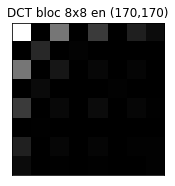

In [160]:
#écrire code      #Decoupage de l'image en sous-blocs de 8x8
(colonne, ligne) = image.shape   #taille img input

# Coordonnee x,y dans l'image pour tester la DCT bloc 8x8
x = colonne//3
y = ligne//3
dctImg = idct2(image[x:x+8,y:y+8]) # prend une matrice de 8x8 dans l'image et fait la DCT dessus

plt.subplot(122),plt.imshow(dctImg, cmap = 'gray', interpolation='none',  vmax = np.max(dctImg)*0.5, vmin = 0)
plt.title('DCT bloc 8x8 en ('+str(x)+','+str(y)+')'), plt.xticks([]), plt.yticks([])
plt.show()

<span style="color:blue">Afficher la DCT par block sur tout l'image</span>

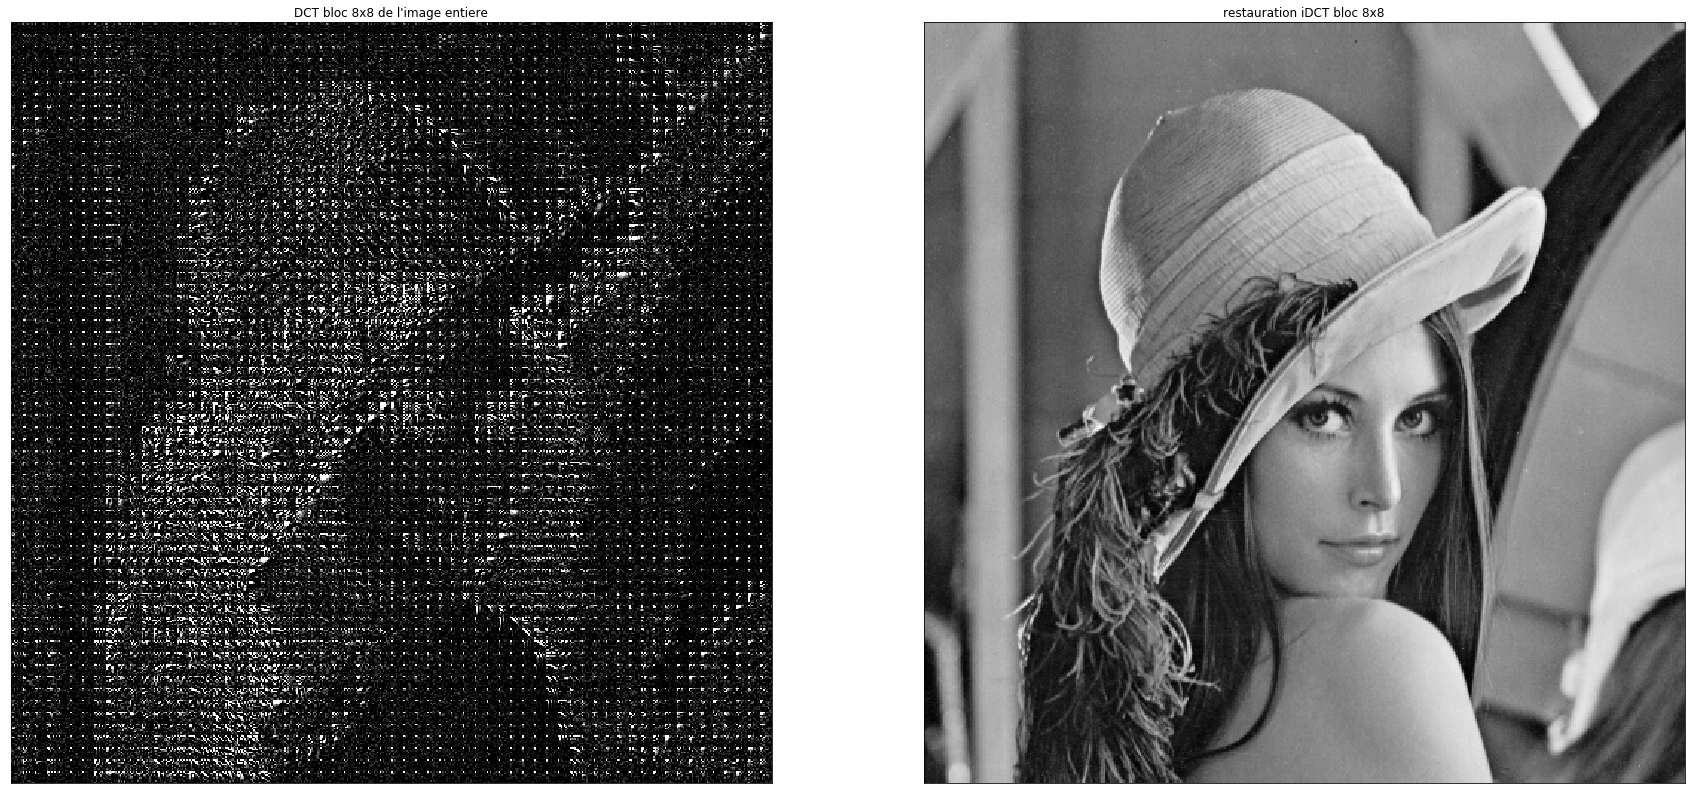

In [38]:
#écrire code
dctBlocImg = dct_par_block(image) # DCT sur bloc de 8x8 de l'image
imgBlocInv = idct_par_block(dctBlocImg) # DCT inverse sur bloc de 8x8 de la DCT bloc 8x8

plt.figure(0,figsize = (30,40))
plt.subplot(121),plt.imshow(dctBlocImg, cmap = 'gray', vmax = np.max(dctBlocImg)*0.01, vmin = 0)
plt.title("DCT bloc 8x8 de l'image entiere"), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgBlocInv, cmap = 'gray')
plt.title("restauration iDCT bloc 8x8"), plt.xticks([]), plt.yticks([])
plt.show()

<span style="color:blue">Est-il préférable de travailler avec des blocs de pixels (de taille 8x8 par exemple) ou
bien sur une image entière?</span>

### Q.4 Definir une fontion pour faire la QUANTIFICATION et calculer l'image apres la quantification

In [315]:
# Matrice de quantification (slide 31,32,33,cours)
def quantification(N, qualite):
    """
    N = size
    qualite=facteur de qualite
    """
    #écrire code
    matrice_quantification=np.zeros((N,N))
    for i in range(0,N) :
        for j in range(0,N) :
            matrice_quantification[i][j]=1+((1+i+j)*qualite)
    return matrice_quantification

In [316]:
#dont need it

#fontion pour obtenir l'image apres quantification IMAGE ENTIER
def image_rec_apres_quant(dct, qualite):
    """
    dct = image apres la DCT
    qualite=facteur de qualite
    """
    #écrire code
    [N,M] = image.shape
    
    table_quant_q=quantification(N, qualite)
    [N,M] = dct.shape #N:nombre de ligne M:nombre de colonne
    Freq_dct_quant=np.zeros((N,M))
    for i in range(0,N) :
        for j in range(0,M) :
            Freq_dct_quant[i][j]=int(dct[i][j]/table_quant_q[i][j])
    img_rec_entiere = idct2(Freq_dct_quant) #*table_quant_q
    return img_rec_entiere

dct_image = dct2(image)
#quantification image entier avec facteur de qualite = [2,4,40]
image_rec_all_1 = image_rec_apres_quant(dct_image, 2)
image_rec_all_2 = image_rec_apres_quant(dct_image, 4)
image_rec_all_3 = image_rec_apres_quant(dct_image, 40)

In [327]:
# quantification et reconstrution IMAGE PAR BLOCKS
def imge_rec_apres_quant_block(image, N, qualite):
    #écrire code
    N=8
    (ligne, colonne) = image.shape
    matriceBloc = np.zeros((ligne, colonne))# contient le bloc 8x8
    # Selection des sous-matrices de 8x8 dans la matrice de 512x512
    for x in range(0, ligne,N):
        for y in range(0, colonne,N):
            matriceBloc[x:x+N,y:y+N] = dct2(image[x:x+N,y:y+N])/quantification(N,qualite) # DCT sur sous-matrices de 8x8 de l'image
    img_rec_block = idct_par_block(matriceBloc)

    return img_rec_block

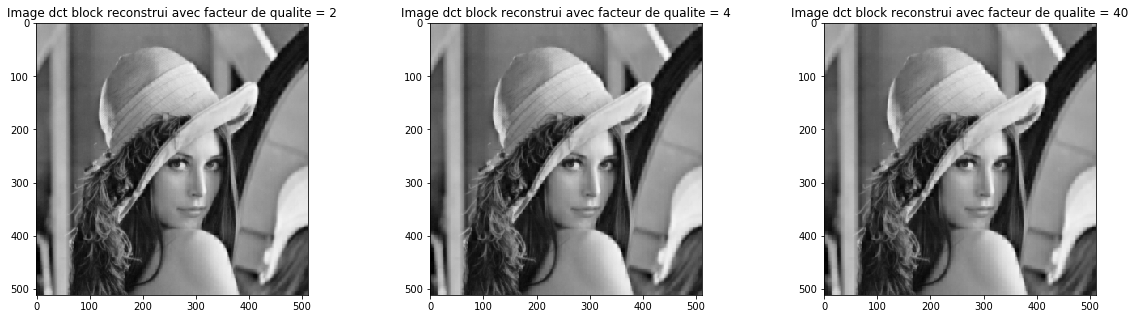

In [328]:
#Faire test defferentes valeur de quantification avec facteur de qualite = [2,4,40]
image_rec_block_1 =  imge_rec_apres_quant_block(image,8,2)
image_rec_block_2 =  imge_rec_apres_quant_block(image,8,4)
image_rec_block_3 =  imge_rec_apres_quant_block(image,8,40)


plt.figure(figsize = (20,5))
plt.subplot(131)
plt.imshow(image_rec_block_1, cmap = 'gray')
plt.title('Image dct block reconstrui avec facteur de qualite = 2')
plt.subplot(132)
plt.imshow(image_rec_block_2, cmap = 'gray')
plt.title('Image dct block reconstrui avec facteur de qualite = 4')
plt.subplot(133)
plt.imshow(image_rec_block_3, cmap = 'gray')
plt.title('Image dct block reconstrui avec facteur de qualite = 40')
plt.show()

In [305]:
#delete

def divide(block, mat):
    new_block = np.zeros((8,8))
    for x in range(8):
        for y in range(8):
            new_block[x,y] = np.floor(block[x,y]/mat[x,y])
    return new_block

In [308]:
#delete

# quantification et reconstrution IMAGE PAR BLOCKS
def apply_quantification(img, matrice_quantification):
    sizeX, sizeY = img.shape
    new_image = np.zeros((sizeX,sizeY))
    for x in range(0, sizeX, 8):
        for y in range(0, sizeY, 8):
            new_image[x:x+8,y:y+8] = divide(img[x:x+8,y:y+8], matrice_quantification)
    return new_image 

def imge_rec_apres_quant_block(dct, N, qualite):
    #écrire code
    matrice_quantification = quantification(N, qualite)
    dct_quant = apply_quantification(dct, matrice_quantification)
    img_rec_block = idct_par_block(dct_quant)
    return img_rec_block
                            

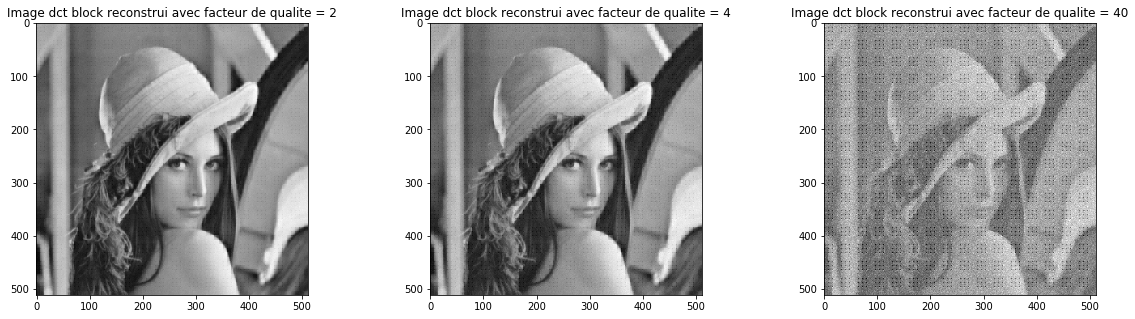

In [309]:
#delete

dct_image = dct_par_block(image)
#Faire test defferentes valeur de quantification avec facteur de qualite = [2,4,40]
image_rec_block_1 =  imge_rec_apres_quant_block(dct_image,8,2)
image_rec_block_2 =  imge_rec_apres_quant_block(dct_image,8,4)
image_rec_block_3 =  imge_rec_apres_quant_block(dct_image,8,40)

plt.figure(figsize = (20,5))
plt.subplot(131)
plt.imshow(image_rec_block_1, cmap = 'gray')
plt.title('Image dct block reconstrui avec facteur de qualite = 2')
plt.subplot(132)
plt.imshow(image_rec_block_2, cmap = 'gray')
plt.title('Image dct block reconstrui avec facteur de qualite = 4')
plt.subplot(133)
plt.imshow(image_rec_block_3, cmap = 'gray')
plt.title('Image dct block reconstrui avec facteur de qualite = 40')
plt.show()

Text(0.5, 1.0, 'Image block 8x8 (Facteur Qualite = 80%)')

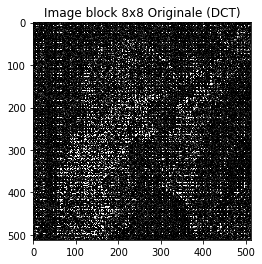

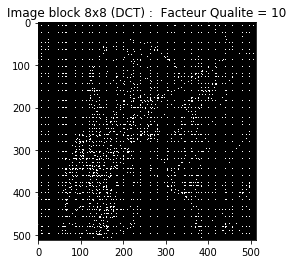

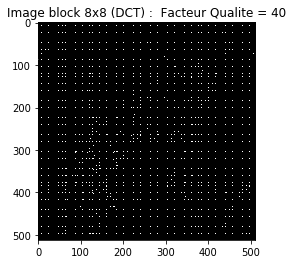

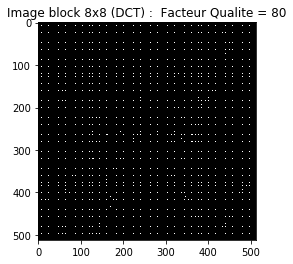

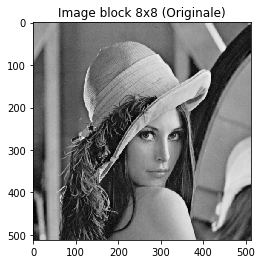

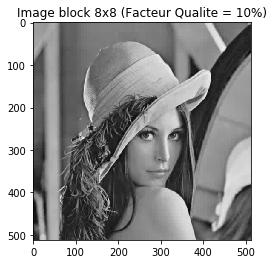

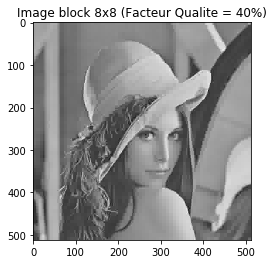

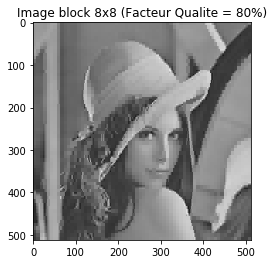

In [143]:
#delete

im = image

imsize = im.shape
dct = np.zeros(imsize)

# Création block 8x8 d'une image 
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )
        

plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Image block 8x8 Originale (DCT)")

# Facteur de qualité
thresh_10 = 0.010 #10% 
dct_thresh_10 = dct * (abs(dct) > (thresh_10*np.max(dct)))

thresh_40 = 0.040 #40% 
dct_thresh_40 = dct * (abs(dct) > (thresh_40*np.max(dct)))

thresh_80 = 0.080 #80% 
dct_thresh_80 = dct * (abs(dct) > (thresh_80*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh_10,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Image block 8x8 (DCT) :  Facteur Qualite = 10")

plt.figure()
plt.imshow(dct_thresh_40,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Image block 8x8 (DCT) :  Facteur Qualite = 40")

plt.figure()
plt.imshow(dct_thresh_80,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Image block 8x8 (DCT) :  Facteur Qualite = 80")


im_dct_10 = np.zeros(imsize)
im_dct_40 = np.zeros(imsize)
im_dct_80 = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct_10[i:(i+8),j:(j+8)] = idct2( dct_thresh_10[i:(i+8),j:(j+8)] )

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct_40[i:(i+8),j:(j+8)] = idct2( dct_thresh_40[i:(i+8),j:(j+8)] )

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct_80[i:(i+8),j:(j+8)] = idct2( dct_thresh_80[i:(i+8),j:(j+8)] )
        

plt.figure()
plt.imshow(im,cmap='gray')
plt.title( "Image block 8x8 (Originale)")

plt.figure()
plt.imshow(im_dct_10,cmap='gray')
plt.title( "Image block 8x8 (Facteur Qualite = 10%)")

plt.figure()
plt.imshow(im_dct_40,cmap='gray')
plt.title( "Image block 8x8 (Facteur Qualite = 40%)")

plt.figure()
plt.imshow(im_dct_80,cmap='gray')
plt.title( "Image block 8x8 (Facteur Qualite = 80%)")

<span style="color:blue">Commentaire les results obtenus. Defferences entre quantification sur image entiere et sur image par block? </span>

<span style="color:blue">Quel est l effet du facteur de qualite?</span>



### Pour comprendre l éffect du facteur de qualite on calcul erreur quadratique moyenne

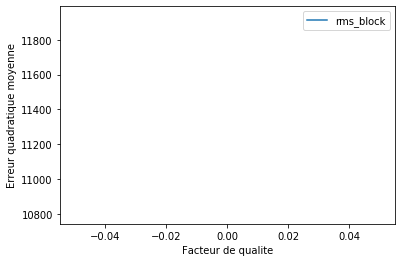

In [333]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#essayer avec un range de valeur de facteur de qualite entre 0 et 20
#rms=mean_squared_error --> erreur quadratique moyenne
#écrire code
#
#
#
  
# Calculation of Mean Squared Error (MSE) 
rms_block = mean_squared_error(image,image_rec_block_2)

#mean_squared_error(Y_true,Y_pred) 

plt.figure()
#plt.plot(rms_entier, '*', label = 'rms_entier')
plt.plot(rms_block, '-', label = 'rms_block')
plt.xlabel('Facteur de qualite')
plt.ylabel('Erreur quadratique moyenne')
plt.legend()
plt.show()

In [330]:
# Given values 
Y_true = [1,1,2,2,4]  # Y_true = Y (original values) 
  
# calculated values 
Y_pred = [0.6,1.29,1.99,2.69,3.4]  # Y_pred = Y' 
  
# Calculation of Mean Squared Error (MSE) 
mean_squared_error(Y_true,Y_pred) 

0.21606

<span style="color:blue">que se passe-t-il lorsque le facteur de qualité augmente? L'ereur quadratique moyenne va augmenter?Le results est pire?</span>


### Q.5 on va appliquer le coda de Huffman.
###### fontion Huffman deja realiser, il faut seulement l'appliquer et telecharger 
###### le fichier huffman.py dans le meme dossier ou vous avez le code.

In [ ]:
#D'abord il faut realiser un fonction pour calculer la DCT par block quantifie:
def quantification_par_block(image, N, qualite):
     """
    image = image initiale
    N = size block
    qualite = facteur de qualite quantification
    """
    #écrire code
    #
    #
    #
    return dct_par_block_quantifie

In [313]:
#Fonction pour calculer la taille de l'image apres la compressione avec le codage de Huffman
def size_compressed_image(image,qualite,original_size):
    """
    image = image initiale
    qualite = facteur de qualite quantification
    original_size = taille de l image de depart
    """

    from huffman import huffman_compute #fontion Huffman deja realiser, il faut seulement l'appliquer et la telecharger 
                                        #dans le meme dossier ou vous avez le code.
    freq_dict, enc_dict = huffman_compute(quantification_block(image, 8, qualite))
    print ('frequence de chaque valeurs de pixel apres la DCT quantifie par block',freq_dict)
    print ('codage frequence de chaque valeurs de pixel apres la DCT quantifie par block ', enc_dict)
    #calculate size of compressed image. Pour chaque valeur on a une probabilite (freq_dict[valeur]) 
    #et un longeur de codage specific (enc_dict[valeur]).
    compressed_size = 0
    #écrire code
    #
    #
    #
    return compressed_size 

# Q.6 Il faut calculer comme il change la taille de l'image compresse et le EQM en fonction du facteur de qualite q (entre 0 et 20).

Vous devez obtenir au finale 3 plots:

-Facteur de qualite Q vs Taille dct quantifie 

-Facteur de qualite Q vs EQM

-Taille dct quantifie vs EQM

Commentaire bien les resultats obtenu. 

In [ ]:
#calculer la taille de l'image compresse et de erreur quadratic moyenne  en fontion du facteur de qualite.
#écrire code
#
#
#

In [ ]:
plt.figure()
plt.plot(.............,'r*')
plt.title('Evolution taille DCT 8x8 quantifie en funtion du facteur de qualite')
plt.xlabel('Facteur de qualite Q')
plt.ylabel('Taille dct quantifie [octs]')
plt.show()

plt.figure()
plt.plot(............,'g*')
plt.title('Evolution taille DCT quantifie en funtion du facteur de qualite')
plt.xlabel('Facteur de qualite Q')
plt.ylabel('EQM')
plt.show()

plt.figure()
plt.plot(.............., '*')
plt.title('Evolution EQM DCT 8x8 quantifie en function de la taille de l image')
plt.xlabel('taille [octs]')
plt.ylabel('EQM')
plt.show()

Commentaire bien les resultats obtenu!